<a href="https://colab.research.google.com/github/Axell1610/scraping_mercadolibre/blob/main/ClasificacionAccidenteCardiovascular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [392]:
import pandas as pd
data = pd.read_csv('prediccion de accidentes cerebrovasculares.csv', encoding='latin-1', delimiter=",")
data

,ID,SEX,ED,HYP,EC,CA,TT,TR,NPG,IMC,ET,AC
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [393]:
data.drop('ID', axis = 1, inplace=True)
data.head()

,SEX,ED,HYP,EC,CA,TT,TR,NPG,IMC,ET,AC
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [394]:
print (data.isnull().sum())

SEX      0
ED       0
HYP      0
EC       0
CA       0
TT       0
TR       0
NPG      0
IMC    201
ET       0
AC       0
dtype: int64


### **IMPUTACION DE DATOS**

In [395]:
# Llenar valores faltantes en 'IMC' con la media
data['IMC'].fillna(data['IMC'].mean(), inplace=True)

# Llenar valores faltantes en 'ET' con el valor más común
data["ET"].replace("Unknown", data["ET"].mode().values[0], inplace=True)

# Redondear 'IMC' a un decimal
data['IMC'] = data['IMC'].round(1)
# Restablecer el índice y mostrar las primeras 5000 filas
data = data.reset_index()
data.head(5110)

,index,SEX,ED,HYP,EC,CA,TT,TR,NPG,IMC,ET,AC
0,0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1
2,2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.9,never smoked,0
5106,5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [396]:
print (data.isnull().sum())

index    0
SEX      0
ED       0
HYP      0
EC       0
CA       0
TT       0
TR       0
NPG      0
IMC      0
ET       0
AC       0
dtype: int64


### **CATEGORICAL ENCODING**

In [397]:
print(data.dtypes)
data.head(1)

index      int64
SEX       object
ED       float64
HYP        int64
EC         int64
CA        object
TT        object
TR        object
NPG      float64
IMC      float64
ET        object
AC         int64
dtype: object


,index,SEX,ED,HYP,EC,CA,TT,TR,NPG,IMC,ET,AC
0,0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


In [398]:
data["SEX"]=data["SEX"].astype('category')
data["CA"]=data["CA"].astype('category')
data["TT"]=data["TT"].astype('category')
data["TR"]=data["TR"].astype('category')
data["ET"]=data["ET"].astype('category')

print(data.dtypes)
data.head()

index       int64
SEX      category
ED        float64
HYP         int64
EC          int64
CA       category
TT       category
TR       category
NPG       float64
IMC       float64
ET       category
AC          int64
dtype: object


,index,SEX,ED,HYP,EC,CA,TT,TR,NPG,IMC,ET,AC
0,0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1
2,2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [399]:
categorical_data=data.drop(['ED','HYP','EC','NPG','IMC','AC'], axis=1)
categorical_data.head()

,index,SEX,CA,TT,TR,ET
0,0,Male,Yes,Private,Urban,formerly smoked
1,1,Female,Yes,Self-employed,Rural,never smoked
2,2,Male,Yes,Private,Rural,never smoked
3,3,Female,Yes,Private,Urban,smokes
4,4,Female,Yes,Self-employed,Rural,never smoked


### **LABEL ENCODING**

In [400]:
categorical_data["SEX"]=categorical_data["SEX"].cat.codes
categorical_data["CA"]=categorical_data["CA"].cat.codes
categorical_data["TT"]=categorical_data["TT"].cat.codes
categorical_data["TR"]=categorical_data["TR"].cat.codes
categorical_data["ET"]=categorical_data["ET"].cat.codes
categorical_data

,index,SEX,CA,TT,TR,ET
0,0,1,1,2,1,0
1,1,0,1,3,0,1
2,2,1,1,2,0,1
3,3,0,1,2,1,2
4,4,0,1,3,0,1
...,...,...,...,...,...,...
5105,5105,0,1,2,1,1
5106,5106,0,1,3,1,1
5107,5107,0,1,3,0,1
5108,5108,1,1,2,0,0


In [401]:
numerical_data=data.drop(['SEX','CA','TT','TR','ET'],axis=1)
numerical_data.head()

,index,ED,HYP,EC,NPG,IMC,AC
0,0,67.0,0,1,228.69,36.6,1
1,1,61.0,0,0,202.21,28.9,1
2,2,80.0,0,1,105.92,32.5,1
3,3,49.0,0,0,171.23,34.4,1
4,4,79.0,1,0,174.12,24.0,1


In [402]:
dataset_new = categorical_data.join(numerical_data, lsuffix='_categorical', rsuffix='_numerical')
dataset_new.head()

,index_categorical,SEX,CA,TT,TR,ET,index_numerical,ED,HYP,EC,NPG,IMC,AC
0,0,1,1,2,1,0,0,67.0,0,1,228.69,36.6,1
1,1,0,1,3,0,1,1,61.0,0,0,202.21,28.9,1
2,2,1,1,2,0,1,2,80.0,0,1,105.92,32.5,1
3,3,0,1,2,1,2,3,49.0,0,0,171.23,34.4,1
4,4,0,1,3,0,1,4,79.0,1,0,174.12,24.0,1


### **ONE-HOT ENCODING**

In [403]:
categorical_data = data.drop(['ED','HYP','EC','NPG','IMC','AC'], axis=1)
encoded_SEX = pd.get_dummies(categorical_data['SEX'])
encoded_CA = pd.get_dummies(categorical_data['CA'])
encoded_TT = pd.get_dummies(categorical_data['TT'])
encoded_TR = pd.get_dummies(categorical_data['TR'])
encoded_ET = pd.get_dummies(categorical_data['ET'])


categorical_data=categorical_data.join(encoded_SEX)
categorical_data=categorical_data.join(encoded_CA)
categorical_data=categorical_data.join(encoded_TT)
categorical_data=categorical_data.join(encoded_TR)
categorical_data=categorical_data.join(encoded_ET)
categorical_data.head(5110)

,index,SEX,CA,TT,TR,ET,Female,Male,Other,No,...,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,formerly smoked,never smoked,smokes
0,0,Male,Yes,Private,Urban,formerly smoked,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
1,1,Female,Yes,Self-employed,Rural,never smoked,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
2,2,Male,Yes,Private,Rural,never smoked,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
3,3,Female,Yes,Private,Urban,smokes,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,4,Female,Yes,Self-employed,Rural,never smoked,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,5105,Female,Yes,Private,Urban,never smoked,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
5106,5106,Female,Yes,Self-employed,Urban,never smoked,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
5107,5107,Female,Yes,Self-employed,Rural,never smoked,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
5108,5108,Male,Yes,Private,Rural,formerly smoked,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0


### **TARGET ENCODING**

In [404]:
categorical_data = data.drop(['ED','HYP','EC','NPG','IMC'], axis=1)
categorical_data["SEX"] = categorical_data["SEX"].astype("category")
categorical_data["SEX"] = categorical_data["SEX"].cat.codes

result_means = categorical_data.groupby('AC')['SEX'].mean()
result_means

AC
0    0.413289
1    0.433735
Name: SEX, dtype: float64

### **BALANCEAMIENTO DE DATOS OVERSAMPLING**

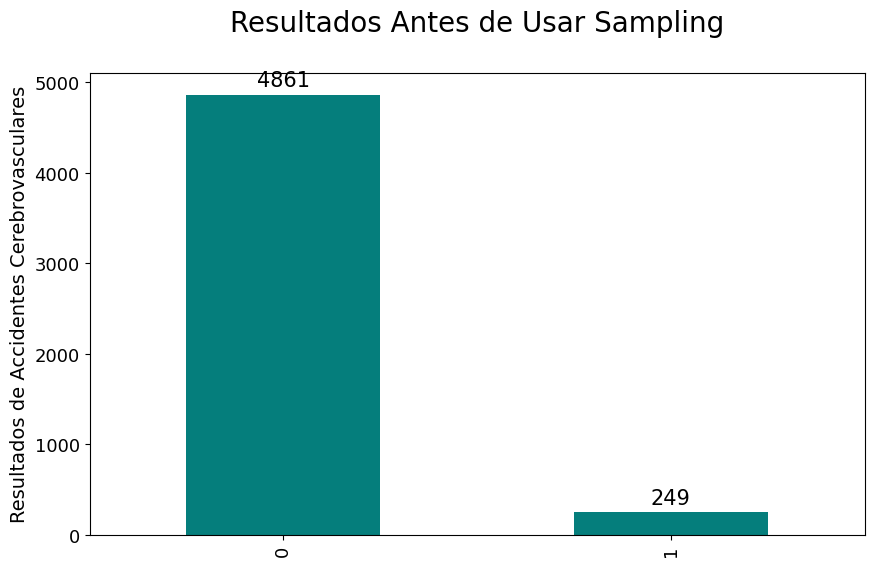

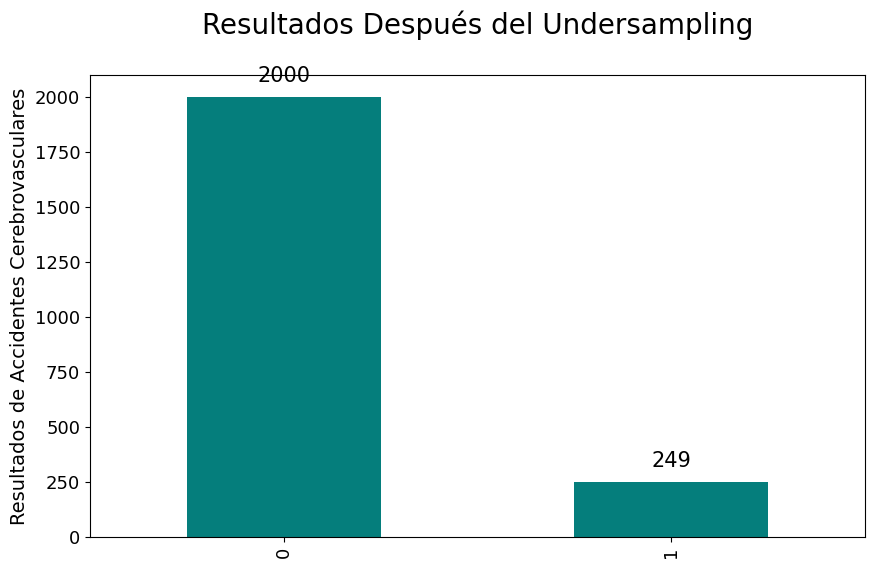

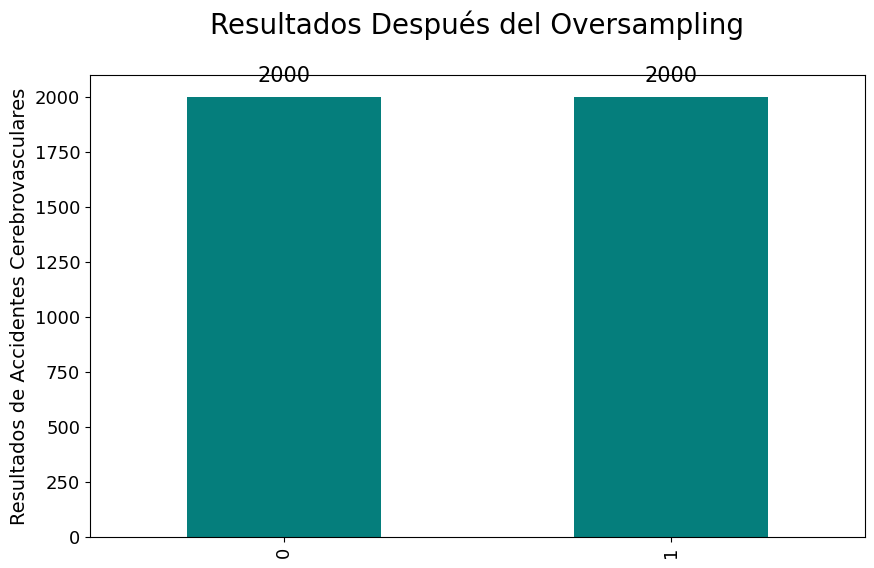

In [405]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Supongamos que tienes un DataFrame llamado "data" con una columna llamada "AC"
# data = pd.read_csv("tu_dataset.csv")

# Visualizar la distribución de clases original
ax = data['AC'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#057E7C')
ax.set_title('Resultados Antes de Usar Sampling', size=20, pad=30)
ax.set_ylabel('Resultados de Accidentes Cerebrovasculares', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 50, str(round(i.get_height(), 2)), fontsize=15, ha='center', va='bottom')

# Dividir los datos en características (X) y etiquetas (y)
X = data.drop("AC", axis=1)
y = data["AC"]

# Especificar el número deseado de muestras para ambas clases
desired_samples_class_0 = 2000
desired_samples_class_1 = 2000

# Crear instancias de RandomUnderSampler solo para la clase mayoritaria
undersampler = RandomUnderSampler(sampling_strategy={0: desired_samples_class_0}, random_state=42)

# Aplicar undersampling a la clase mayoritaria
X_resampled_under, y_resampled_under = undersampler.fit_resample(X, y)

# Visualizar la distribución de clases después del undersampling
plt.figure(figsize=(10, 6))
ax_resampled_under = pd.Series(y_resampled_under).value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#057E7C')
ax_resampled_under.set_title('Resultados Después del Undersampling', size=20, pad=30)
ax_resampled_under.set_ylabel('Resultados de Accidentes Cerebrovasculares', fontsize=14)

for i in ax_resampled_under.patches:
    ax_resampled_under.text(i.get_x() + i.get_width() / 2, i.get_height() + 50, str(round(i.get_height(), 2)), fontsize=15, ha='center', va='bottom')

# Crear instancias de RandomOverSampler solo para la clase minoritaria
oversampler = RandomOverSampler(sampling_strategy={1: desired_samples_class_1}, random_state=42)

# Aplicar oversampling a la clase minoritaria
X_resampled_over, y_resampled_over = oversampler.fit_resample(X_resampled_under, y_resampled_under)

# Visualizar la distribución de clases después del oversampling
plt.figure(figsize=(10, 6))
ax_resampled_over = pd.Series(y_resampled_over).value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#057E7C')
ax_resampled_over.set_title('Resultados Después del Oversampling', size=20, pad=30)
ax_resampled_over.set_ylabel('Resultados de Accidentes Cerebrovasculares', fontsize=14)

for i in ax_resampled_over.patches:
    ax_resampled_over.text(i.get_x() + i.get_width() / 2, i.get_height() + 50, str(round(i.get_height(), 2)), fontsize=15, ha='center', va='bottom')

# Mostrar ambos gráficos
plt.show()


### MODELOS

In [406]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, roc_curve, roc_auc_score

In [407]:
# Aplicar codificación one-hot a las variables categóricas
categorical_features = ['SEX', 'CA', 'TT', 'TR', 'ET']
X_resampled_encoded = pd.get_dummies(X_resampled_over, columns=categorical_features, drop_first=True)

# Dividir los datos resampleados en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled_encoded, y_resampled_over, test_size=0.2, random_state=2)

###MODELO RANDOM FOREST

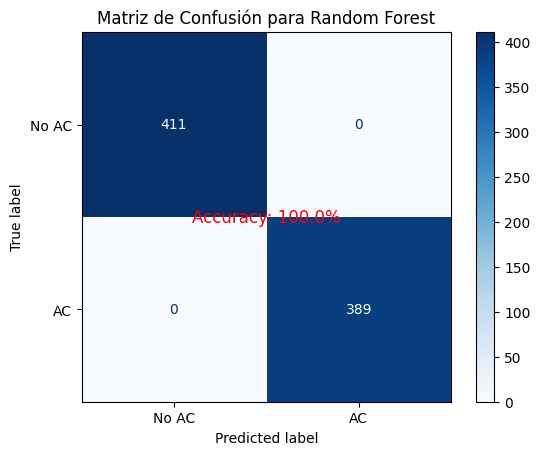


--------------------------------------------------------
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       411
           1       1.00      1.00      1.00       389

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800


--------------------------------------------------------


In [408]:
# Entrenar Random Forest y mostrar matriz de confusión
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

# Calcular la precisión
accuracy_rfc = rfc.score(X_test, y_test)

# Imprimir matriz de confusión
disp_rfc = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rfc), display_labels=['No AC', 'AC'])
disp_rfc.plot(cmap='Blues', values_format='d')
plt.text(0.5, 0.5, f'Accuracy: {round(accuracy_rfc * 100, 2)}%', color='red', fontsize=12, ha='center', va='center', transform=plt.gca().transAxes)
plt.title('Matriz de Confusión para Random Forest')
plt.show()

# Imprimir reporte de clasificación
print("\n--------------------------------------------------------")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rfc))
print("\n--------------------------------------------------------")

###MODELO REGRESION LOGISTICA

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


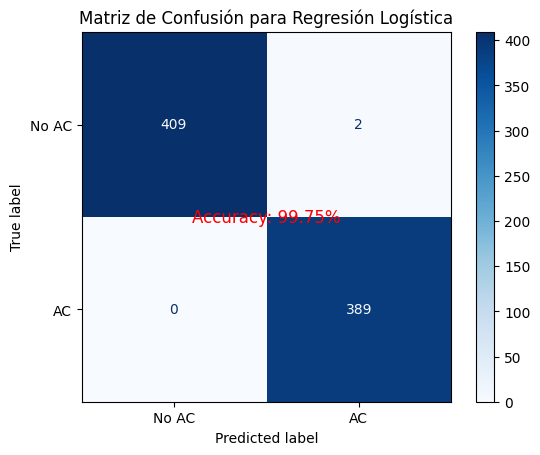


--------------------------------------------------------
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       411
           1       0.99      1.00      1.00       389

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800


--------------------------------------------------------


In [409]:
# Entrenar Regresión Logística y mostrar matriz de confusión
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Calcular la precisión
accuracy_lr = lr.score(X_test, y_test)

# Imprimir matriz de confusión
disp_lr = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lr), display_labels=['No AC', 'AC'])
disp_lr.plot(cmap='Blues', values_format='d')
plt.text(0.5, 0.5, f'Accuracy: {round(accuracy_lr * 100, 2)}%', color='red', fontsize=12, ha='center', va='center', transform=plt.gca().transAxes)
plt.title('Matriz de Confusión para Regresión Logística')
plt.show()

# Imprimir reporte de clasificación
print("\n--------------------------------------------------------")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("\n--------------------------------------------------------")

###Support Vector Machine

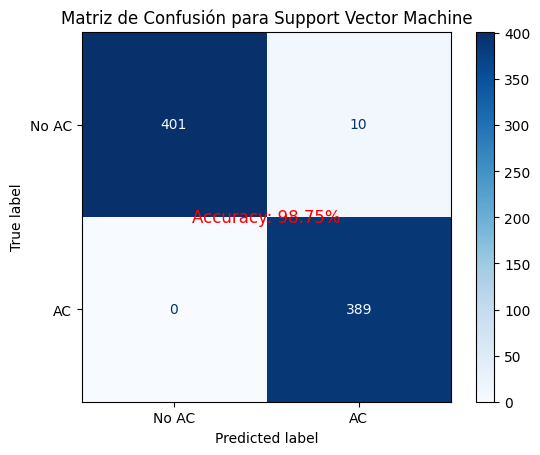


--------------------------------------------------------
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       411
           1       0.97      1.00      0.99       389

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800


--------------------------------------------------------


In [410]:
# Entrenar Support Vector Machine y mostrar matriz de confusión
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Calcular la precisión
accuracy_svm = svm.score(X_test, y_test)

# Imprimir matriz de confusión
disp_svm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_svm), display_labels=['No AC', 'AC'])
disp_svm.plot(cmap='Blues', values_format='d')
plt.text(0.5, 0.5, f'Accuracy: {round(accuracy_svm * 100, 2)}%', color='red', fontsize=12, ha='center', va='center', transform=plt.gca().transAxes)
plt.title('Matriz de Confusión para Support Vector Machine')
plt.show()

# Imprimir reporte de clasificación
print("\n--------------------------------------------------------")
print("Support Vector Machine Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("\n--------------------------------------------------------")

###Naibe Bayes

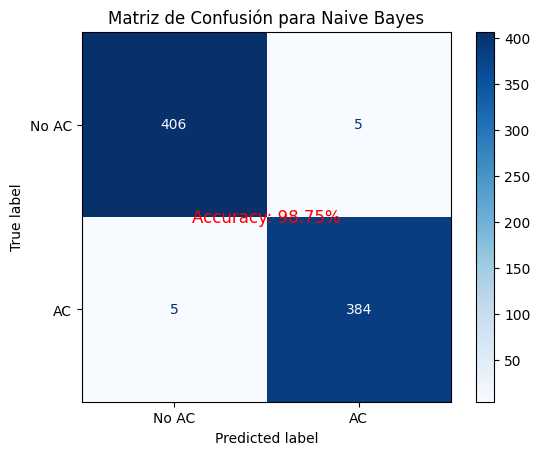


--------------------------------------------------------
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       411
           1       0.99      0.99      0.99       389

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800


--------------------------------------------------------


In [411]:
# Entrenar Naive Bayes y mostrar matriz de confusión
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Calcular la precisión
accuracy_nb = nb.score(X_test, y_test)

# Imprimir matriz de confusión
disp_nb = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_nb), display_labels=['No AC', 'AC'])
disp_nb.plot(cmap='Blues', values_format='d')
plt.text(0.5, 0.5, f'Accuracy: {round(accuracy_nb * 100, 2)}%', color='red', fontsize=12, ha='center', va='center', transform=plt.gca().transAxes)
plt.title('Matriz de Confusión para Naive Bayes')
plt.show()

# Imprimir reporte de clasificación
print("\n--------------------------------------------------------")
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))
print("\n--------------------------------------------------------")

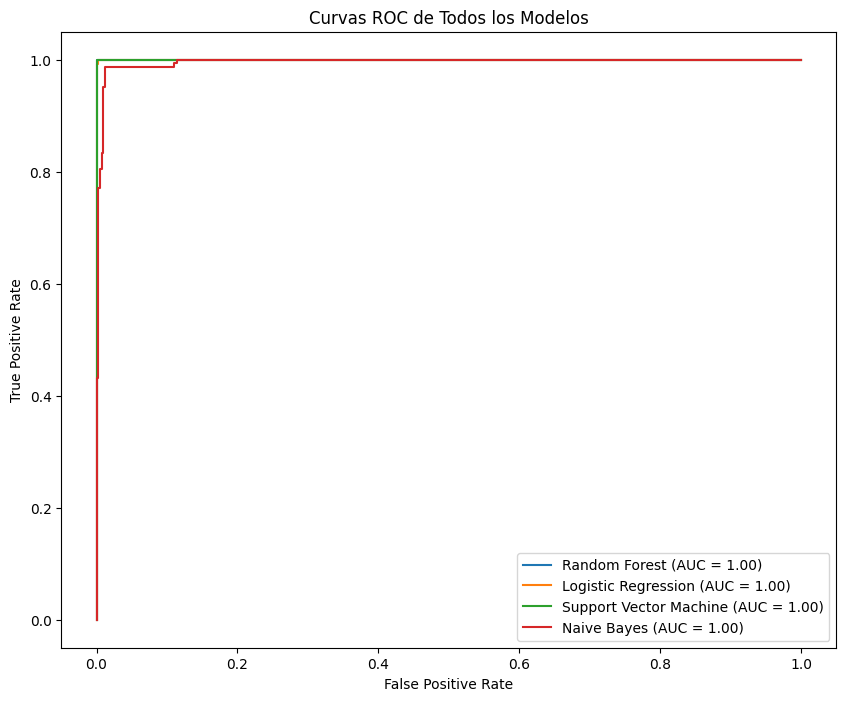

In [416]:
from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades de predicción para cada modelo
y_probs = {
    'Random Forest': rfc.predict_proba(X_test)[:, 1],
    'Logistic Regression': lr.predict_proba(X_test)[:, 1],
    'Support Vector Machine': svm.decision_function(X_test),
    'Naive Bayes': nb.predict_proba(X_test)[:, 1],
}

# Crear un gráfico para mostrar todas las curvas ROC
plt.figure(figsize=(10, 8))

for model, probs in y_probs.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

plt.title('Curvas ROC de Todos los Modelos')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()